In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from xgboost import XGBClassifier
from tabulate import tabulate
import itertools


In [167]:
all_data = pd.read_csv('all_data (3).csv')

In [168]:
print(all_data.head())
print(all_data.columns)

   ifInOctets11  ifOutOctets11  ifoutDiscards11  ifInUcastPkts11  \
0    1867925250      902237363                0         52007310   
1    1994338334      903845459                0         52098054   
2    2116573334      905396546                0         52185853   
3    2257767832      907308930                0         52287097   
4    2342047724      908534112                0         52347521   

   ifInNUcastPkts11  ifInDiscards11  ifOutUcastPkts11  ifOutNUcastPkts11  \
0             16978               0           7197292               3968   
1             16986               0           7227073               3968   
2             16994               0           7255792               3969   
3             17015               0           7291152               3975   
4             17043               0           7313830               3977   

   tcpOutRsts  tcpInSegs  ...  ipForwDatagrams  ipOutNoRoutes  ipInAddrErrors  \
0           1        682  ...         59244345       

In [169]:
print(all_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ifInOctets11         4998 non-null   int64 
 1   ifOutOctets11        4998 non-null   int64 
 2   ifoutDiscards11      4998 non-null   int64 
 3   ifInUcastPkts11      4998 non-null   int64 
 4   ifInNUcastPkts11     4998 non-null   int64 
 5   ifInDiscards11       4998 non-null   int64 
 6   ifOutUcastPkts11     4998 non-null   int64 
 7   ifOutNUcastPkts11    4998 non-null   int64 
 8   tcpOutRsts           4998 non-null   int64 
 9   tcpInSegs            4998 non-null   int64 
 10  tcpOutSegs           4998 non-null   int64 
 11  tcpPassiveOpens      4998 non-null   int64 
 12  tcpRetransSegs       4998 non-null   int64 
 13  tcpCurrEstab         4998 non-null   int64 
 14  tcpEstabResets       4998 non-null   int64 
 15  tcp?ActiveOpens      4998 non-null   int64 
 16  udpInD

In [170]:
all_data.shape

(4998, 35)

In [171]:
print(all_data.describe())

       ifInOctets11  ifOutOctets11  ifoutDiscards11  ifInUcastPkts11  \
count  4.998000e+03   4.998000e+03      4998.000000     4.998000e+03   
mean   2.161260e+09   1.281552e+09     36377.437975     9.150696e+07   
std    1.233852e+09   1.153395e+09     74228.977904     5.800683e+07   
min    1.426588e+06   1.618430e+05         0.000000     7.013690e+05   
25%    1.094045e+09   3.724623e+08         0.000000     5.020809e+07   
50%    2.180395e+09   8.935678e+08         0.000000     7.906267e+07   
75%    3.221204e+09   2.448435e+09      4216.000000     1.313896e+08   
max    4.294416e+09   4.294061e+09    196630.000000     2.439828e+08   

       ifInNUcastPkts11  ifInDiscards11  ifOutUcastPkts11  ifOutNUcastPkts11  \
count       4998.000000     4998.000000      4.998000e+03        4998.000000   
mean       20425.803922    36377.561825      2.680787e+07        4967.060624   
std         7936.895813    74228.989718      2.328438e+07        1784.778092   
min         2735.000000        

In [172]:
print(all_data.isnull().sum())

ifInOctets11           0
ifOutOctets11          0
ifoutDiscards11        0
ifInUcastPkts11        0
ifInNUcastPkts11       0
ifInDiscards11         0
ifOutUcastPkts11       0
ifOutNUcastPkts11      0
tcpOutRsts             0
tcpInSegs              0
tcpOutSegs             0
tcpPassiveOpens        0
tcpRetransSegs         0
tcpCurrEstab           0
tcpEstabResets         0
tcp?ActiveOpens        0
udpInDatagrams         0
udpOutDatagrams        0
udpInErrors            0
udpNoPorts             0
ipInReceives           0
ipInDelivers           0
ipOutRequests          0
ipOutDiscards          0
ipInDiscards           0
ipForwDatagrams        0
ipOutNoRoutes          0
ipInAddrErrors         0
icmpInMsgs             0
icmpInDestUnreachs     0
icmpOutMsgs            0
icmpOutDestUnreachs    0
icmpInEchos            0
icmpOutEchoReps        0
class                  0
dtype: int64


In [173]:
print(f"Number of duplicate rows: {all_data.duplicated().sum()}")

Number of duplicate rows: 0


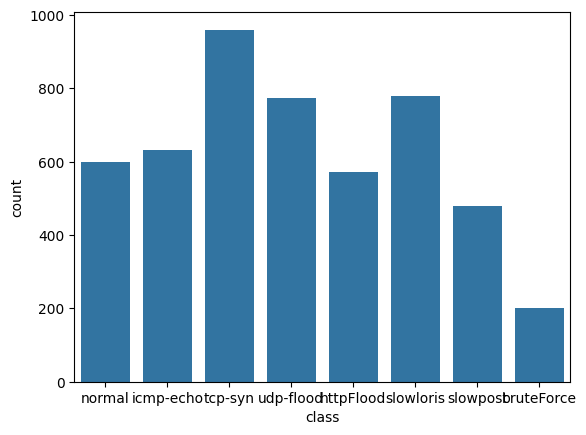

In [174]:
sns.countplot(x=all_data['class'])
plt.show()

In [175]:
def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

label_encode(all_data)

In [176]:
missing_percent = all_data.isnull().sum() / len(all_data) * 100

columns_to_drop = missing_percent[missing_percent > 90].index
all_data.drop(columns_to_drop, axis=1, inplace=True)

In [177]:
X = all_data.drop(['class'], axis=1)
Y = all_data['class']

In [178]:
rfc = RandomForestClassifier()

In [179]:
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X, Y)

In [180]:
feature_map = [(i, v) for i, v in zip(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [181]:
print("Selected Features:")
print(selected_features)

Selected Features:
['ifOutOctets11', 'ifInUcastPkts11', 'ifOutUcastPkts11', 'tcpInSegs', 'tcpOutSegs', 'tcpPassiveOpens', 'ipInReceives', 'ipOutRequests', 'ipOutDiscards', 'icmpOutMsgs']


In [182]:
X = X[selected_features]


In [183]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [184]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=2)

In [185]:
print("Shapes after train split:")
print(x_train.shape, y_train.shape)

Shapes after train split:
(3498, 10) (3498,)


In [186]:
print("Shapes after test split:")
print(x_test.shape, y_test.shape)

Shapes after test split:
(1500, 10) (1500,)


In [187]:
import time
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.8229050636291504


In [188]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.005844593048095703


In [189]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [190]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9376786735277302
Test Score: 0.934


In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
clf = LogisticRegression(max_iter=1200000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=1200000)

In [193]:
y_pred = clf.predict(x_test)

In [194]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        61
           1       1.00      0.88      0.94       162
           2       0.96      0.81      0.88       190
           3       0.94      0.96      0.95       193
           4       0.93      1.00      0.96       233
           5       0.92      1.00      0.96       144
           6       0.90      0.95      0.92       291
           7       0.99      0.99      0.99       226

    accuracy                           0.94      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.94      0.94      0.93      1500



In [195]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 44   0   0   0   0   9   8   0]
 [  0 143   1   5   0   2  11   0]
 [ 17   0 154   6   0   0  11   2]
 [  0   0   0 186   7   0   0   0]
 [  0   0   0   0 233   0   0   0]
 [  0   0   0   0   0 144   0   0]
 [  0   0   5   0  10   0 276   0]
 [  0   0   1   0   0   2   0 223]]


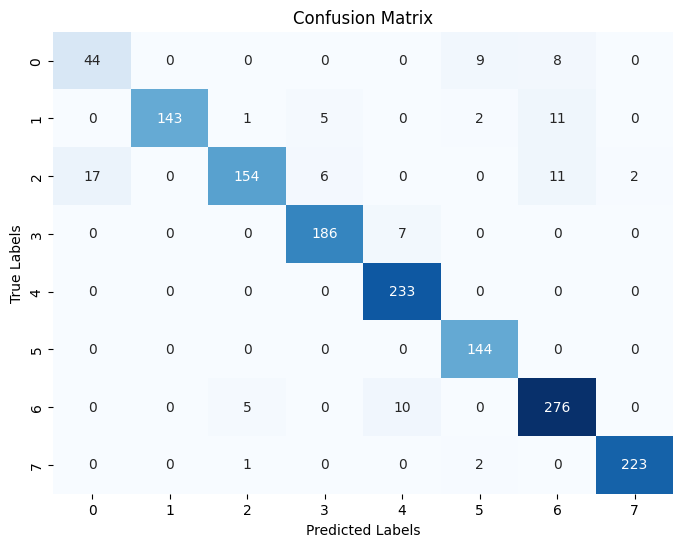

In [196]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [197]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.53%


In [198]:
pip install optuna

In [199]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [200]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy


In [201]:

study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)


FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9986666666666667], datetime_start=datetime.datetime(2024, 7, 8, 10, 43, 57, 689104), datetime_complete=datetime.datetime(2024, 7, 8, 10, 43, 57, 780937), params={'KNN_n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [202]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")



Train Score: 1.0
Test Score: 0.9986666666666667


In [203]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


Training time:  0.02242898941040039


In [204]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.001978158950805664


In [205]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy


In [206]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)


FrozenTrial(number=2, state=TrialState.COMPLETE, values=[1.0], datetime_start=datetime.datetime(2024, 7, 8, 10, 43, 58, 211616), datetime_complete=datetime.datetime(2024, 7, 8, 10, 43, 58, 225788), params={'dt_max_depth': 26, 'dt_max_features': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=2, value=None)


In [207]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 1.0


In [208]:
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      1        │     0.998667 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.937679 │     0.934    │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     1        │
╘═════════════════════╧═══════════════╧══════════════╛


In [209]:
SEED = 42

dtc = DecisionTreeClassifier()

knn = KNeighborsClassifier()

lr = LogisticRegression()

In [210]:

from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [211]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [212]:

preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [213]:
def optimize_logistic_regression(trial):
    C = trial.suggest_loguniform('lr_C', 1e-5, 1e2)
    lr = LogisticRegression(C=C, max_iter=1200000)
    lr.fit(x_train, y_train)
    return lr.score(x_test, y_test)

In [214]:
def optimize_decision_tree(trial):
    max_depth = trial.suggest_int('dt_max_depth', 2, 32)
    max_features = trial.suggest_int('dt_max_features', 2, 10)

    dt = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    dt.fit(x_train, y_train)

    return dt.score(x_test, y_test)


In [215]:
def optimize_knn(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)

    return knn.score(x_test, y_test)


In [216]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(optimize_decision_tree, n_trials=30)


In [217]:
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(optimize_knn, n_trials=30)

In [218]:
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(optimize_logistic_regression, n_trials=30)

<ipython-input-213-cb7bb886cc37>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('lr_C', 1e-5, 1e2)
<ipython-input-213-cb7bb886cc37>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('lr_C', 1e-5, 1e2)
<ipython-input-213-cb7bb886cc37>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('lr_C', 1e-5, 1e2)
<ipython-input-213-cb7bb886cc37>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remov

In [219]:
best_lr_C = study_lr.best_trial.params['lr_C']
lr = LogisticRegression(C=best_lr_C, max_iter=1200000)
lr.fit(x_train, y_train)
lr_train_score = lr.score(x_train, y_train)
lr_test_score = lr.score(x_test, y_test)
print(f"Logistic Regression Train Score: {lr_train_score:.4f}")
print(f"Logistic Regression Test Score: {lr_test_score:.4f}")

Logistic Regression Train Score: 0.9874
Logistic Regression Test Score: 0.9800


In [220]:
best_knn_n_neighbors = study_knn.best_trial.params['KNN_n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_knn_n_neighbors)
knn.fit(x_train, y_train)
knn_train_score = knn.score(x_train, y_train)
knn_test_score = knn.score(x_test, y_test)
print(f"KNeighborsClassifier Train Score: {knn_train_score:.4f}")
print(f"KNeighborsClassifier Test Score: {knn_test_score:.4f}")


KNeighborsClassifier Train Score: 1.0000
KNeighborsClassifier Test Score: 0.9993


In [221]:
best_dt_max_depth = study_dt.best_trial.params['dt_max_depth']
best_dt_max_features = study_dt.best_trial.params['dt_max_features']
dt = DecisionTreeClassifier(max_depth=best_dt_max_depth, max_features=best_dt_max_features)
dt.fit(x_train, y_train)
dt_train_score = dt.score(x_train, y_train)
dt_test_score = dt.score(x_test, y_test)
print(f"Decision Tree Train Score: {dt_train_score:.4f}")
print(f"Decision Tree Test Score: {dt_test_score:.4f}")

Decision Tree Train Score: 1.0000
Decision Tree Test Score: 0.9993


In [222]:
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Logistic Regression F1-score: {f1_lr:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        61
           1       1.00      0.94      0.97       162
           2       0.99      0.93      0.96       190
           3       0.99      1.00      0.99       193
           4       1.00      1.00      1.00       233
           5       0.97      1.00      0.99       144
           6       0.95      1.00      0.98       291
           7       0.99      0.99      0.99       226

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.98      0.98      0.98      1500

Logistic Regression Confusion Matrix:
[[ 57   0   2   0   0   2   0   0]
 [  0 152   0   0   0   0  10   0]
 [  6   0 176   2   0   0   4   2]
 [  0   0   0 193   0   0   0   0]
 [  0   0   0   0 233   0   0   0]
 [  0   0   0   0   0 144   0   0]
 [  0   0   0   0   0   0 291   0]
 [  0   0   0   0   0  

In [223]:
y_pred_dt = dt.predict(x_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree F1-score: {f1_dt:.4f}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       190
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00       233
           5       1.00      0.99      1.00       144
           6       1.00      1.00      1.00       291
           7       1.00      1.00      1.00       226

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Decision Tree Confusion Matrix:
[[ 61   0   0   0   0   0   0   0]
 [  0 162   0   0   0   0   0   0]
 [  0   0 190   0   0   0   0   0]
 [  0   0   0 193   0   0   0   0]
 [  0   0   0   0 233   0   0   0]
 [  0   0   0   0   0 143   0   1]
 [  0   0   0   0   0   0 291   0]
 [  0   0   0   0   0   0   0 226]]

In [224]:
y_pred_knn = knn.predict(x_test)

print("KNeighborsClassifier Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("KNeighborsClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"KNeighborsClassifier F1-score: {f1_knn:.4f}")


KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      0.99      1.00       162
           2       1.00      1.00      1.00       190
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       291
           7       1.00      1.00      1.00       226

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

KNeighborsClassifier Confusion Matrix:
[[ 61   0   0   0   0   0   0   0]
 [  0 161   0   0   0   0   1   0]
 [  0   0 190   0   0   0   0   0]
 [  0   0   0 193   0   0   0   0]
 [  0   0   0   0 233   0   0   0]
 [  0   0   0   0   0 144   0   0]
 [  0   0   0   0   0   0 291   0]
 [  0   0   0   0   0

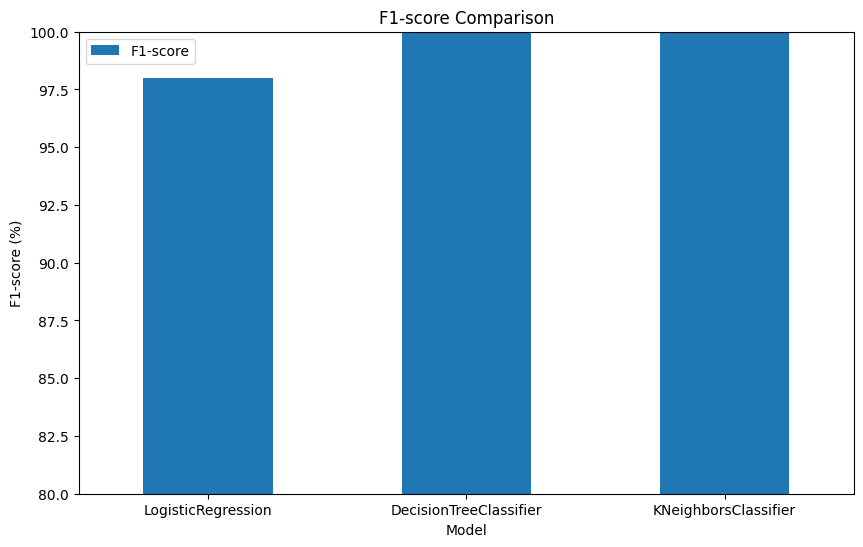

In [225]:
f1_scores = {
    'LogisticRegression': f1_lr,
    'DecisionTreeClassifier': f1_dt,
    'KNeighborsClassifier': f1_knn
}

f1_scores_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-score']) * 100

f1_scores_df.plot(kind='bar', ylim=[80, 100], figsize=(10, 6), rot=0)
plt.title('F1-score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-score (%)')
plt.show()
